#  Python Notebook Example
Fei Zhang 
@GeoscienceAustralia 2016


#### Objectives:
- Access netCDF data directly from /g/data  
- Access netCDF data using OPeNDAP


### Import libraries

In [20]:
# Only 2 required for this demo
from netCDF4 import Dataset, num2date, date2num
from ipywidgets import *
import matplotlib.pyplot as plt
%matplotlib inline

### Accessing a file directly on /g/data
- Note: This does not yet load/extract data

In [2]:
!ls /g/data/rs0/tiles/EPSG3577/LS5_TM_NBAR/LS5_TM_NBAR_3577_15_-40_2006.nc

/g/data/rs0/tiles/EPSG3577/LS5_TM_NBAR/LS5_TM_NBAR_3577_15_-40_2006.nc


In [3]:
f = Dataset('/g/data/rs0/tiles/EPSG3577/LS5_TM_NBAR/LS5_TM_NBAR_3577_15_-40_2006.nc', 'r')
#f = Dataset('/Softdata/data/water_extents/149_-036/py_stacked_CF.nc', 'r')

#### Can use the netCDF4 library to see information about the file
The dimension and variables can be also shown by ncdump -h

In [4]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

y <type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 4000

x <type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 4000

time <type 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 88

extra_metadata_nchar <type 'netCDF4._netCDF4.Dimension'>: name = 'extra_metadata_nchar', size = 30000



In [5]:
## Look at variables
vars = f.variables.keys()
for item in vars:
    print 'Variable: \t', item
    print 'Dimensions: \t', f[item].dimensions
    print 'Shape:    \t', f[item].shape, '\n'

Variable: 	y
Dimensions: 	(u'y',)
Shape:    	(4000,) 

Variable: 	x
Dimensions: 	(u'x',)
Shape:    	(4000,) 

Variable: 	time
Dimensions: 	(u'time',)
Shape:    	(88,) 

Variable: 	crs
Dimensions: 	()
Shape:    	() 

Variable: 	band_7
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(88, 4000, 4000) 

Variable: 	band_4
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(88, 4000, 4000) 

Variable: 	band_5
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(88, 4000, 4000) 

Variable: 	band_2
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(88, 4000, 4000) 

Variable: 	band_3
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(88, 4000, 4000) 

Variable: 	band_1
Dimensions: 	(u'time', u'y', u'x')
Shape:    	(88, 4000, 4000) 

Variable: 	extra_metadata
Dimensions: 	(u'time', u'extra_metadata_nchar')
Shape:    	(88, 30000) 



In [4]:
# Extract Metadata

geocrs=f.variables['crs']
print geocrs

<type 'netCDF4._netCDF4.Variable'>
int32 crs()
    grid_mapping_name: albers_conical_equal_area
    standard_parallel: [-18. -36.]
    longitude_of_central_meridian: 132.0
    latitude_of_projection_origin: 0.0
    false_easting: 0.0
    false_northing: 0.0
    long_name: GDA94 / Australian Albers
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.31414
    inverse_flattening: 298.257222101
    crs_wkt: PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],UNIT["metre",1,AUTHORITY["EPSG","9001"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_

In [5]:
extrameta=f.variables['extra_metadata']
print extrameta

<type 'netCDF4._netCDF4.Variable'>
|S1 extra_metadata(time, extra_metadata_nchar)
unlimited dimensions: 
current shape = (88, 30000)
filling on, default _FillValue of   used



In [6]:
print "".join(extrameta[0,:])   # not OK. How to determin the magic number 11771?
#print "".join(extrameta[0,:11770])  #OK


TypeError: sequence item 11771: expected string, MaskedConstant found

#### Extracting data
- A really nice feature of netCDF/HDF files is that you can extract subsets without having to load entire file into memory

In [7]:
## %%timeit

i1 = 4000
i2 = 4000

t=f.variables['time']
y = f.variables['y'][:i1]
x = f.variables['x'][:i2]


In [8]:
band1 = f['band_1'][:, :, :]
band2 = f['band_2'][:, :, :]
band3 = f['band_3']

In [58]:
print type(band1),type (band3)

<class 'numpy.ma.core.MaskedArray'> <type 'netCDF4._netCDF4.Variable'>


In [59]:
#do not do this:   print band1   too_big
print band3

<type 'netCDF4._netCDF4.Variable'>
int16 band_3(time, y, x)
    _FillValue: -999
    grid_mapping: crs
    units: 1
    long_name: Nadir BRDF Adjusted Reflectance 0.63-0.69 microns (Red)
    standard_name: surface_bidirectional_reflectance
unlimited dimensions: 
current shape = (88, 4000, 4000)
filling on


In [34]:
t

<type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: seconds since 1970-01-01 00:00:00
    long_name: Time, unix time-stamp
    standard_name: time
    calendar: standard
    axis: T
unlimited dimensions: 
current shape = (88,)
filling on, default _FillValue of 9.96920996839e+36 used

In [52]:
type (band1)

numpy.ma.core.MaskedArray

In [35]:
delta_t= t[1:]-t[:-1]

In [36]:
print delta_t/60

[  4.01917617e-01   1.00859463e+04   3.99549882e-01   1.29536214e+04
   3.99534802e-01   1.00859296e+04   3.99549898e-01   1.29540090e+04
   1.00859268e+04   3.99550001e-01   2.86767870e+03   1.00863225e+04
   3.31262139e+04   4.01917720e-01   2.86767395e+03   1.00859008e+04
   3.99550001e-01   1.00858929e+04   3.99550001e-01   2.86767158e+03
   1.00858865e+04   3.99550001e-01   1.00858756e+04   2.86806575e+03
   1.00858623e+04   3.99549882e-01   1.00858737e+04   3.99550001e-01
   2.86766878e+03   1.00859017e+04   3.99549997e-01   1.00862896e+04
   2.86766682e+03   1.00858864e+04   3.99550001e-01   1.00858931e+04
   3.99550001e-01   2.86766862e+03   1.00858845e+04   3.99550116e-01
   1.00858784e+04   3.99549997e-01   2.86766643e+03   1.00858717e+04
   3.99550096e-01   1.00858755e+04   3.99550215e-01   2.86766445e+03
   1.00858718e+04   3.99550100e-01   1.00858709e+04   3.99550100e-01
   1.29535336e+04   3.99550100e-01   1.00858685e+04   3.99550215e-01
   2.86766400e+03   2.01721331e+04

In [37]:
delta_t.shape

(87,)

In [38]:
from scipy import stats
stats.describe(delta_t)

DescribeResult(nobs=87, minmax=(23.972087860107422, 1987572.8329999447), mean=333686.27833369956, variance=137814979499.63312, skewness=1.283737050869461, kurtosis=2.881452540175138)

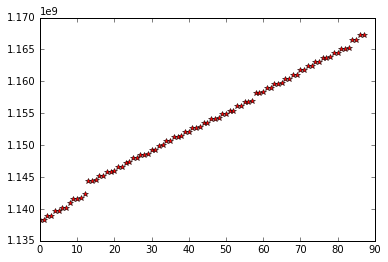

In [46]:

plt.plot(t, "r*")
plt.show()

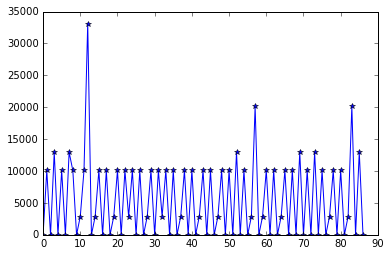

In [49]:
plt.plot(delta_t/60.0, 'b*-')
plt.show()

### Plotting  with user input parameter
Interactive visualization

- http://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

- http://earthpy.org/pyncview_pm.html

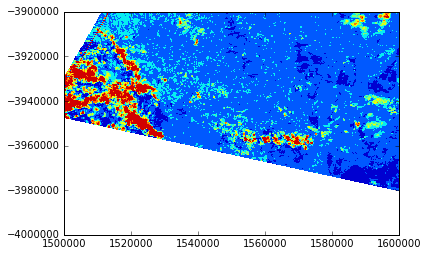

In [12]:
%matplotlib inline 
plt.contourf(x, y, band3[0,:,:])

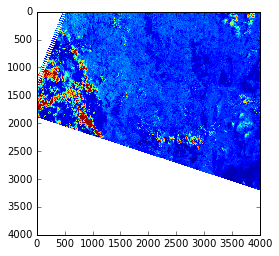

In [17]:
plt.imshow(band3[0,:,:])

In [21]:
def show(time):
    plt.imshow(band1[time,:,:])

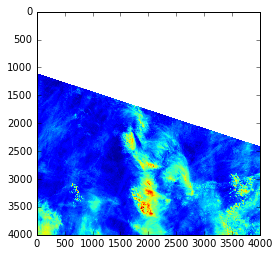

In [22]:
interact(show, time=(1,80,1));

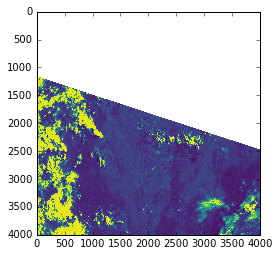

In [26]:
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

time=0
im = plt.imshow(band1[time,:,:], cmap=plt.get_cmap('viridis'), animated=True)


def updatefig(*args):
    global time
    time += 1

    im.set_array(band1[time,:,:])
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

### Accessing a file using OPeNDAP
- Advantage: If dataset available, you can access from anywhere just as you'd call a local file. 
- Disadvantage: Not as fast as having the file locally. 

Note: You can see how fast the data extraction was with the '%%timeit' function in the cell above and compare it to the length of time OPeNDAP method takes in the cell below. 

In [19]:
f = Dataset('http://dapds00.nci.org.au/thredds/dodsC/rr5/satellite/obs/himawari8/FLDK/2016/01/03/0030/20160103003000-P1S-ABOM_BRF_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc', 'r')

#### After opening the file with the OPeNDAP address, the file can be handled no differently to the above in situ example. 

In [20]:
## Display dimensions for file
for item in f.dimensions:
    print item, f.dimensions[item]

time <type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1

x <type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 5500

y <type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 5500



In [21]:
##    %%timeit

i1 = 1000
i2 = 4000
ch02 = f['channel_0002_brf'][0, i1:i2, i1:i2]
y = f.variables['y'][i1:i2]
x = f.variables['x'][i1:i2]

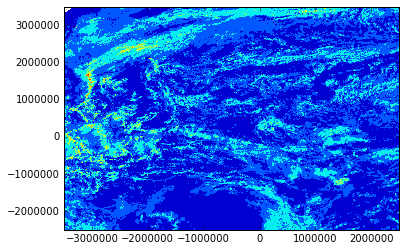

In [22]:
%matplotlib inline 
plt.contourf(x, y, ch02)

In [23]:
print f.Metadata_Conventions, f.netCDF_version, f.geospatial_lat_max, f.geospatial_lat_units

attrib=f.ncattrs

print type(attrib)

Unidata Dataset Discovery v1.0 4.2.1.1 of May 10 2013 10:38:04 $ 79.2637 degree_north
<type 'builtin_function_or_method'>


In [1]:
15729193 + 270807

16000000